In [15]:
import sympy
import sympy.vector
# Pretty printing
sympy.init_printing(use_unicode=True)
# Default coordinate system to use.
C = sympy.vector.CoordSys3D('C')

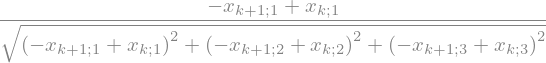

In [16]:
# Derivative of ||x_k - x_{k+1}|| wrt x_{k,n}
xk1, xk2, xk3, xkp1, xkp2, xkp3 = sympy.symbols("x_{k;1} x_{k;2} x_{k;3} x_{k+1;1} x_{k+1;2} x_{k+1;3}")
normderivative = sympy.sqrt((xk1 - xkp1)**2 + (xk2 - xkp2)**2 + (xk3 - xkp3)**2)
sympy.diff(normderivative, xk1)

In [ ]:
# Index Test
i, j, k = sympy.symbols('i j k')
# Coordinates
x = sympy.IndexedBase('x')
# Edge Lengths
l = sympy.IndexedBase('l')
# Edge Coordinate Difference
t = sympy.IndexedBase('t')
x[i,j]

In [18]:
# Creating vector
def vectorize(a, b, c):
    return a * C.i + b * C.j + c * C.k

# Norm
def norm(v):
    return sympy.sqrt(v.dot(v))

# Normalizing
def normalize(v):
    return v / norm(v)

u = vectorize(1,2,3)
v = vectorize(4,5,6)
u ^ v

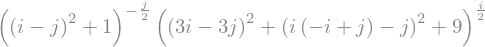

In [19]:
# Kernel
def kernelalphabeta(p, q, T, alpha, beta):
    numerator = norm(T ^ (p - q)) ** alpha
    denominator = norm(p - q) ** beta
    return numerator / denominator

# k[i,j]
def quadratureKernel(xi, xj, xip1, xjp1, Ti, alpha, beta):
    res = kernelalphabeta(xi, xj, Ti, alpha, beta)
    res += kernelalphabeta(xi, xjp1, Ti, alpha, beta)
    res += kernelalphabeta(xip1, xj, Ti, alpha, beta)
    res += kernelalphabeta(xip1, xjp1, Ti, alpha, beta)
    return res / 4


p = vectorize(i, i, j)
q = vectorize(j, i+1, j)
T = vectorize(j, i, 3)
kernelalphabeta(p, q, T, i, j)

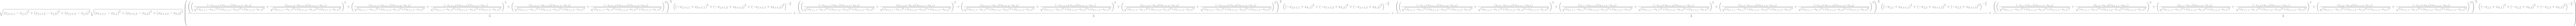

In [20]:
def energysummand(i, j, alpha, beta):
    xi = vectorize(x[i,1], x[i, 2], x[i, 3])
    xip1 = vectorize(x[i+1,1], x[i+1, 2], x[i+1, 3])
    xj = vectorize(x[j,1], x[j, 2], x[j, 3])
    xjp1 = vectorize(x[j+1,1], x[j+1, 2], x[j+1, 3])
    Ti = normalize(xip1 - xi)
    return quadratureKernel(xi, xj, xip1, xjp1, Ti, alpha, beta) * norm(xip1 - xi) * norm(xjp1 - xj)

alpha, beta = sympy.symbols('alpha beta')
energysummand(k, j, alpha, beta)

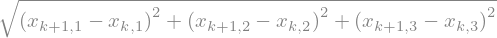

In [21]:
# Expected Common Terms
def edgelength(i):
    global x
    edge = vectorize(x[i+1, 1], x[i+1, 2], x[i+1, 3]) - vectorize(x[i, 1], x[i, 2], x[i, 3])
    return norm(edge)

commonTerms = [
    (edgelength(i), l[i]),
    (edgelength(j), l[j]),
    (edgelength(k), l[k]),
    (x[i+1, 1] - x[i, 1], t[i, 1]),
    (x[j+1, 1] - x[j, 1], t[j, 1]),
    (x[k+1, 1] - x[k, 1], t[k, 1])
]
edgelength(k)

In [24]:
# (k, j) derivative wrt x_{k,1}
kjDiffkp1 = sympy.diff(energysummand(k, j, alpha, beta), x[k,1]).subs(commonTerms)


KeyboardInterrupt: 

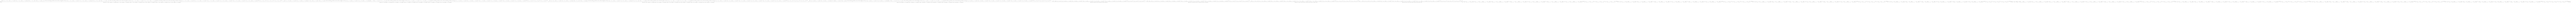

In [23]:
kjDiffkp1